In [2]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#set up sample data
n_samples, n_features = 100, 1
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)

In [4]:
#create large test range
Xmax = X.max(axis=0)
Xmin = X.min(axis=0)
nsteps=100
Xtest=None
for xcol in range(0,n_features):
    ftest = np.linspace(Xmin[xcol],Xmax[xcol],nsteps)
    ftest=np.resize(ftest,(nsteps,1))
    if Xtest is None:
        Xtest = ftest
    else:
        Xtest=np.concatenate((Xtest,ftest),axis=1)  

In [5]:
fits=dict()
grid_density=7
alphalist = np.logspace(-6,0,grid_density)
gammalist = np.logspace(-3,3,grid_density)
for alpha in alphalist:
    for gamma in gammalist:
        label="%.6e_%.6e" % (alpha,gamma)
        clf = KernelRidge(alpha=alpha, gamma=gamma, coef0=1, degree=3, kernel='rbf')
        clf_fit = clf.fit(X,y)
        clf_predict = clf_fit.predict(X)
        rmse = np.sqrt(mean_squared_error(y, clf_predict))
        clf_predict_largetest = clf_fit.predict(Xtest)
        fits[label]=dict()
        fits[label]['rmse']=rmse
        fits[label]['alpha']=alpha
        fits[label]['gamma']=gamma
        fits[label]['fit']=clf_fit
        fits[label]['predict']=clf_predict
        fits[label]['predict_largetest']=clf_predict_largetest
labels=list(fits.keys())

In [6]:
min_rmse=10000
for label in labels:
    rmse = fits[label]['rmse']
    if rmse < min_rmse: 
        min_rmse = rmse
        min_alpha = fits[label]['alpha']
        min_gamma = fits[label]['gamma']
print("Min RMSE: %s" % min_rmse)
print("Alpha: %s" % min_alpha)
print("Gamma: %s" % min_gamma)
chooselabel = "%.6e_%.6e" % (min_alpha, min_gamma)
print(chooselabel)

Min RMSE: 0.0938839588956
Alpha: 1e-06
Gamma: 1000.0
1.000000e-06_1.000000e+03


In [7]:
reducegrid=2
alist=alphalist.tolist()
alist.sort()
glist=gammalist.tolist()
glist.sort()
min_alpha_idx = alist.index(min_alpha)
min_gamma_idx = glist.index(min_gamma)
min_grid = grid_density // reducegrid
alowidx = max(min_alpha_idx - min_grid,0)
ahighidx = min(min_alpha_idx + min_grid, len(alist))
glowidx = max(min_gamma_idx - min_grid,0)
ghighidx = min(min_gamma_idx + min_grid, len(glist))
printalphas = alist[alowidx:ahighidx]
printgammas = glist[glowidx:ghighidx]
print(printalphas)
print(printgammas)
printlabels=list()
for alpha in printalphas:
    printlabel = "%.6e_%.6e" % (alpha,min_gamma)
    printlabels.append(printlabel)    
for gamma in printgammas:
    printlabel = "%.6e_%.6e" % (min_alpha, gamma)
    printlabels.append(printlabel)


[1e-06, 1e-05, 0.0001]
[1.0, 10.0, 100.0, 1000.0]


Alpha, gamma: 1.000000e-06_1.000000e+03


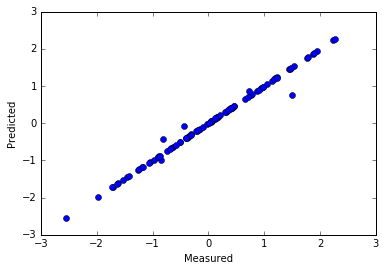

In [8]:
print("Alpha, gamma: %s" % chooselabel)
plt.figure()
plt.plot(y, fits[chooselabel]['predict'],'bo')
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.show()

Alpha: 1e-06, gamma: 1000.0


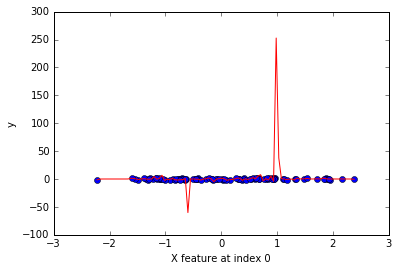

Alpha: 1e-05, gamma: 1000.0


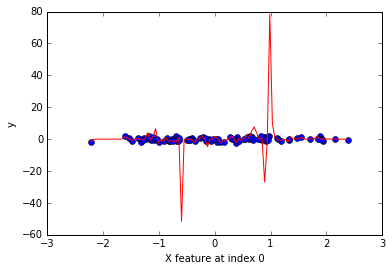

Alpha: 0.0001, gamma: 1000.0


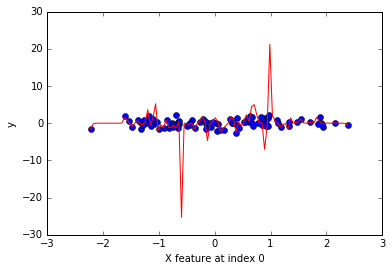

Alpha: 1e-06, gamma: 1.0


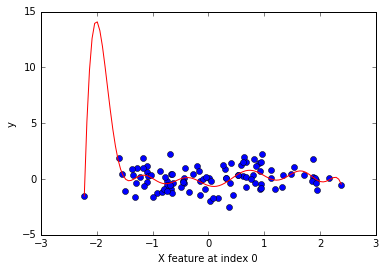

Alpha: 1e-06, gamma: 10.0


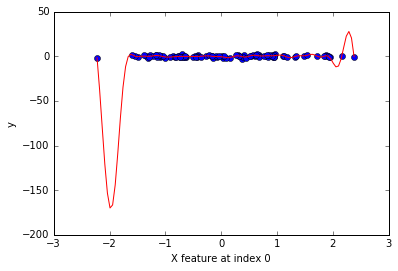

Alpha: 1e-06, gamma: 100.0


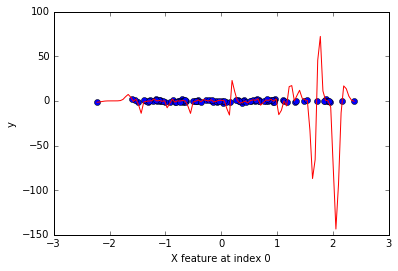

Alpha: 1e-06, gamma: 1000.0


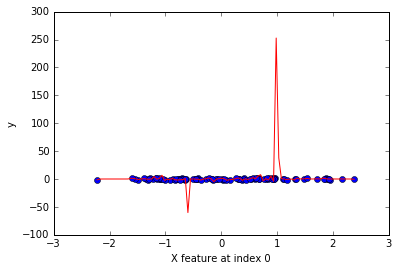

In [10]:
featureidx=0
for label in printlabels:
    print("Alpha: %s, gamma: %s" % (fits[label]['alpha'],fits[label]['gamma']))
    plt.figure()
    plt.plot(X[:,featureidx], y,'bo', label="Measured")
    #plt.plot(X[:,featureidx], fits[label]['predict'],'rd', label="Predicted")
    plt.plot(Xtest[:,featureidx], fits[label]['predict_largetest'],'r-',label="Predicted")
    plt.xlabel('X feature at index %i' % featureidx)
    plt.ylabel('y')
    plt.show()